In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
comptages = (
    pd
    .read_csv('datasets/comptages.csv')
    .assign(
        datetime = lambda df: pd.to_datetime(df["Date et heure de comptage"], utc=True, errors='coerce')
    )
)
    
comptages

,Identifiant du compteur,Identifiant du site de comptage,Date et heure de comptage,Comptage horaire,datetime
0,100003096-353242251,100003096,2022-06-01T06:00:00+02:00,27.0,2022-06-01 04:00:00+00:00
1,100003096-353242251,100003096,2022-06-01T09:00:00+02:00,199.0,2022-06-01 07:00:00+00:00
2,100003096-353242251,100003096,2022-06-01T05:00:00+02:00,7.0,2022-06-01 03:00:00+00:00
3,100003096-353242251,100003096,2022-06-01T07:00:00+02:00,76.0,2022-06-01 05:00:00+00:00
4,100003096-353242251,100003096,2022-06-01T19:00:00+02:00,144.0,2022-06-01 17:00:00+00:00
...,...,...,...,...,...
920975,300030271-353356061,300030271,2023-07-23T06:00:00+02:00,2.0,2023-07-23 04:00:00+00:00
920976,300030271-353356061,300030271,2023-07-23T07:00:00+02:00,5.0,2023-07-23 05:00:00+00:00
920977,300030271-353356061,300030271,2023-07-23T11:00:00+02:00,42.0,2023-07-23 09:00:00+00:00
920978,300030271-353356061,300030271,2023-07-23T17:00:00+02:00,15.0,2023-07-23 15:00:00+00:00


In [54]:
compteurs = (
    pd
    .read_csv('datasets/compteurs.csv')
    .groupby('Identifiant du site de comptage')
    .first()
    [['Nom du site de comptage']]
)
    
compteurs

,Nom du site de comptage
Identifiant du site de comptage,
100003096,97 avenue Denfert Rochereau
100003097,105 rue La Fayette
100003098,106 avenue Denfert Rochereau
100003099,100 rue La Fayette
100006300,135 avenue Daumesnil
...,...
300030173,77 boulevard Masséna
300030219,81 boulevard Mortier
300030250,98 boulevard Poniatowski


In [108]:
comptages.datetime.dt.to_period('d')

/tmp/ipykernel_1263480/3517873206.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  comptages.datetime.dt.to_period('d')


0         2022-06-01
1         2022-06-01
2         2022-06-01
3         2022-06-01
4         2022-06-01
             ...    
920975    2023-07-23
920976    2023-07-23
920977    2023-07-23
920978    2023-07-23
920979    2023-07-23
Name: datetime, Length: 920980, dtype: period[D]

In [56]:
table = (
    comptages
    .pivot_table(
        index   = comptages.datetime.dt.to_period('d'),
        columns = 'Identifiant du site de comptage',
        values  = 'Comptage horaire',
        aggfunc = 'sum'
    )
)

table

/tmp/ipykernel_1263480/1206517381.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  index   = comptages.datetime.dt.to_period('d'),


Identifiant du site de comptage,100003096,100003097,100003098,100003099,100006300,100007049,100036718,100036719,100041488,100042374,...,300030121,300030139,300030160,300030163,300030172,300030173,300030219,300030250,300030271,300030279
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1642.0,2835.0,2202.0,0.0,2151.0,2185.0,4498.0,2664.0,2088.0,4437.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,1749.0,2776.0,2148.0,0.0,2277.0,2164.0,4671.0,2499.0,2155.0,4641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-03,1410.0,2155.0,1720.0,0.0,1637.0,1768.0,3291.0,1932.0,1682.0,2812.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19,1757.0,NaN,2774.0,NaN,2046.0,1692.0,4550.0,2572.0,1825.0,4616.0,...,1462.0,1664.0,2001.0,698.0,2818.0,2821.0,1482.0,2926.0,1475.0,1867.0
2023-07-20,1630.0,NaN,8637.0,NaN,2177.0,1823.0,4309.0,2604.0,1898.0,4492.0,...,1417.0,1590.0,1874.0,708.0,2940.0,2782.0,1506.0,2983.0,1478.0,1799.0
2023-07-21,1427.0,NaN,797.0,NaN,1838.0,1600.0,3460.0,2025.0,1726.0,3334.0,...,1152.0,1424.0,1493.0,636.0,2434.0,2344.0,1322.0,2361.0,1203.0,1524.0


array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

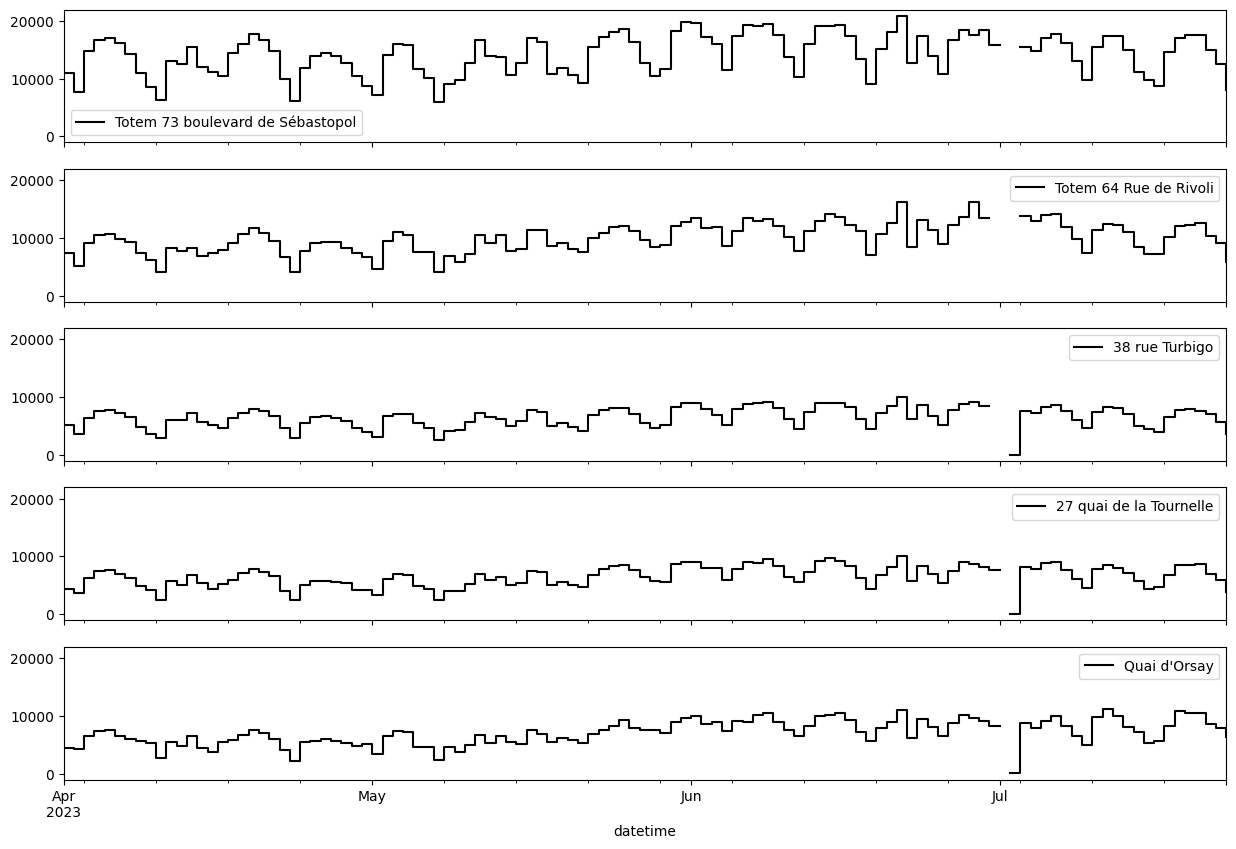

In [61]:
(
    table
    [table.sum().sort_values(ascending=False).head(5).index]
    .rename(
        lambda c: compteurs.loc[c]["Nom du site de comptage"],
        axis=1
    )
    .loc['2023-04':]
    .plot
    .line(
        drawstyle='steps-post',
        sharey=True,
        subplots=True,
        figsize=(15,10),
        color='black'
    )
)

/tmp/ipykernel_1263480/1208934239.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()
/tmp/ipykernel_1263480/1208934239.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  table


array([<Axes: xlabel='Jour'>, <Axes: xlabel='Jour'>,
       <Axes: xlabel='Jour'>, <Axes: xlabel='Jour'>,
       <Axes: xlabel='Jour'>], dtype=object)

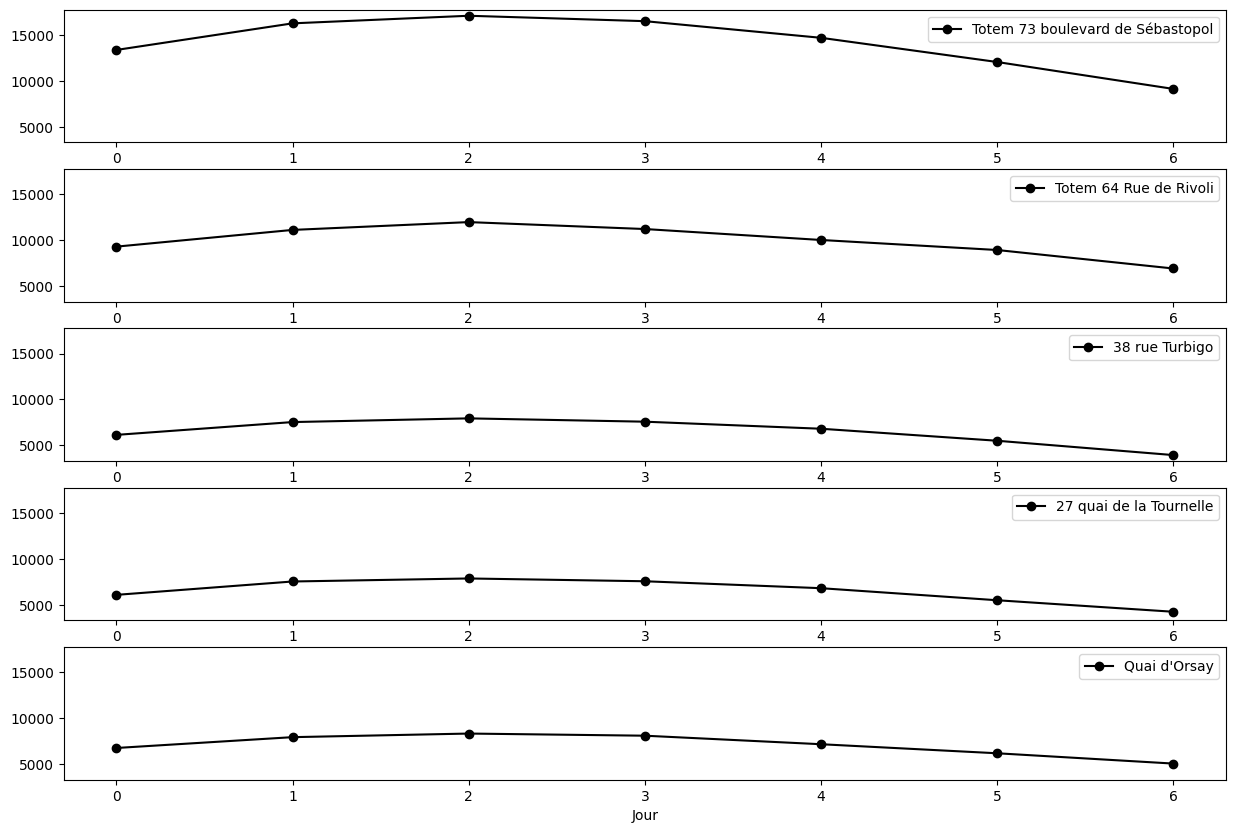

In [103]:
fig, ax = plt.subplots(figsize=(15,10))

(
    table
    .loc['2023-04':]
    [table.sum().sort_values(ascending=False).head(5).index]
    .rename(
        lambda c: compteurs.loc[c]["Nom du site de comptage"],
        axis=1
    )
    .assign(
        Jour = lambda df: df.index.astype('datetime64[ns]').weekday,
        Semaine = lambda df: df.index.astype('datetime64[ns]').strftime('%Y-%U')
    )
    .groupby('Jour')
    .mean()    
    .plot
    .line(
        ax=ax,
        marker="o",
        sharey=True,
        subplots=True,
        color='black'
    )
)

array([<Axes: xlabel='Jour'>, <Axes: xlabel='Jour'>,
       <Axes: xlabel='Jour'>, <Axes: xlabel='Jour'>,
       <Axes: xlabel='Jour'>], dtype=object)

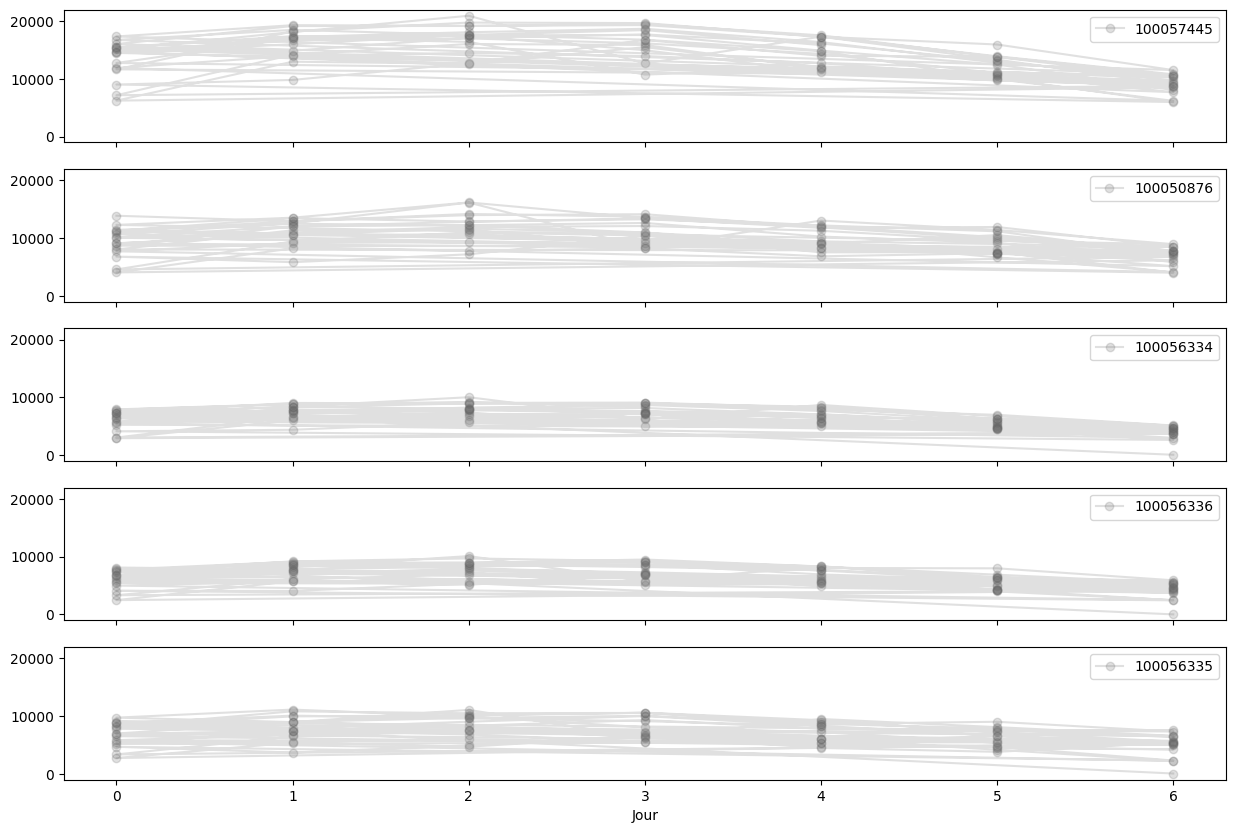

In [91]:
(
    table
    .loc['2023-04':]
    [table.sum().sort_values(ascending=False).head(5).index]
    .assign(
        Jour = lambda df: df.index.astype('datetime64[ns]').weekday,
        Semaine = lambda df: df.index.astype('datetime64[ns]').strftime('%Y-%U')
    )
    .plot
    .line(
        x = "Jour",
        color='#666',
        alpha=.2,
        marker="o",
        sharey=True,
        subplots=True,
        figsize=(15,10),
    )
)